# importing libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the csv file in pandas dataframe

In [230]:
data_train=pd.read_csv("pml-training.csv",index_col=0)

/home/ummarshaik/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# checking the column names, shape , data types 

In [231]:
data_train.columns

Index(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2',
       'cvtd_timestamp', 'new_window', 'num_window', 'roll_belt', 'pitch_belt',
       'yaw_belt', 'total_accel_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=159)

In [232]:
data_train.shape

(19622, 159)

In [233]:
#how the columns datatypes
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19622 entries, 1 to 19622
Columns: 159 entries, user_name to classe
dtypes: float64(94), int64(28), object(37)
memory usage: 24.0+ MB


# In the dataset we need to classify the target varibale 'classe', we will find what classes are there 

In [234]:
data_train['classe'].value_counts()

A    5580
B    3797
E    3607
C    3422
D    3216
Name: classe, dtype: int64

## checing the first five rows

In [235]:
data_train.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,3,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,3,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,3,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


## checking the total nan values column wise

In [236]:
data_train.isna().sum()

user_name                      0
raw_timestamp_part_1           0
raw_timestamp_part_2           0
cvtd_timestamp                 0
new_window                     0
num_window                     0
roll_belt                      0
pitch_belt                     0
yaw_belt                       0
total_accel_belt               0
kurtosis_roll_belt         19216
kurtosis_picth_belt        19216
kurtosis_yaw_belt          19216
skewness_roll_belt         19216
skewness_roll_belt.1       19216
skewness_yaw_belt          19216
max_roll_belt              19216
max_picth_belt             19216
max_yaw_belt               19216
min_roll_belt              19216
min_pitch_belt             19216
min_yaw_belt               19216
amplitude_roll_belt        19216
amplitude_pitch_belt       19216
amplitude_yaw_belt         19216
var_total_accel_belt       19216
avg_roll_belt              19216
stddev_roll_belt           19216
var_roll_belt              19216
avg_pitch_belt             19216
          

# reading the test data set

In [237]:
data_test=pd.read_csv("pml-testing.csv",index_col=0)

## checking for the nan values columnwise

In [238]:
data_test.isna().sum()

user_name                   0
raw_timestamp_part_1        0
raw_timestamp_part_2        0
cvtd_timestamp              0
new_window                  0
num_window                  0
roll_belt                   0
pitch_belt                  0
yaw_belt                    0
total_accel_belt            0
kurtosis_roll_belt         20
kurtosis_picth_belt        20
kurtosis_yaw_belt          20
skewness_roll_belt         20
skewness_roll_belt.1       20
skewness_yaw_belt          20
max_roll_belt              20
max_picth_belt             20
max_yaw_belt               20
min_roll_belt              20
min_pitch_belt             20
min_yaw_belt               20
amplitude_roll_belt        20
amplitude_pitch_belt       20
amplitude_yaw_belt         20
var_total_accel_belt       20
avg_roll_belt              20
stddev_roll_belt           20
var_roll_belt              20
avg_pitch_belt             20
                           ..
max_roll_forearm           20
max_picth_forearm          20
max_yaw_fo

In [239]:
data_test.shape

(20, 159)

In [240]:
data_test.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,20,...,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,4,...,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,5,...,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,17,...,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,3,...,-0.75,3.10,0.80,131,-93,172,375,-787,91,5


## whether the columns names of train and test datasets are equal

In [241]:
columns_train=data_test.columns

In [242]:
columns_test=data_train.columns

In [243]:
columns_train==columns_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## the last column is different between train and test

In [244]:
data_test.problem_id

1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
Name: problem_id, dtype: int64

In [245]:
data_test

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,20,...,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,4,...,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,5,...,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,17,...,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,3,...,-0.75,3.10,0.80,131,-93,172,375,-787,91,5
6,jeremy,1322673149,510661,30/11/2011 17:12,no,504,-5.92,1.59,-87.70,4,...,-0.88,4.26,1.35,230,322,-144,-300,800,884,6
7,jeremy,1322673128,766645,30/11/2011 17:12,no,485,1.20,4.44,-87.30,4,...,-0.53,1.80,0.75,-192,170,-175,-678,284,585,7
8,jeremy,1322673076,54671,30/11/2011 17:11,no,440,0.43,4.15,-88.50,4,...,0.63,-0.74,0.49,-151,-331,-282,-109,-619,-32,8
9,carlitos,1323084240,916313,05/12/2011 11:24,no,323,0.93,6.72,-93.70,4,...,0.03,0.02,-0.02,195,204,-217,0,652,469,9
10,charles,1322837822,384285,02/12/2011 14:57,no,664,114.00,22.40,-13.10,18,...,0.02,0.13,-0.07,-212,98,-7,-403,723,512,10


In [246]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Columns: 159 entries, user_name to problem_id
dtypes: float64(124), int64(32), object(3)
memory usage: 25.0+ KB


In [247]:
data_train.describe(include='object').T

,count,unique,top,freq
user_name,19622,6,adelmo,3892
cvtd_timestamp,19622,20,28/11/2011 14:14,1498
new_window,19622,2,no,19216
kurtosis_roll_belt,406,396,#DIV/0!,10
kurtosis_picth_belt,406,316,#DIV/0!,32
kurtosis_yaw_belt,406,1,#DIV/0!,406
skewness_roll_belt,406,394,#DIV/0!,9
skewness_roll_belt.1,406,337,#DIV/0!,32
skewness_yaw_belt,406,1,#DIV/0!,406
max_yaw_belt,406,91,-1.4,23


In [248]:
data_train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
raw_timestamp_part_1,19622.0,1.322827e+09,204927.679809,1.322490e+09,1.322673e+09,1.322833e+09,1.323084e+09,1.323095e+09
raw_timestamp_part_2,19622.0,5.006561e+05,288222.879958,2.940000e+02,2.529122e+05,4.963800e+05,7.518908e+05,9.988010e+05
num_window,19622.0,4.306400e+02,247.909554,1.000000e+00,2.220000e+02,4.240000e+02,6.440000e+02,8.640000e+02
roll_belt,19622.0,6.440720e+01,62.750255,-2.890000e+01,1.100000e+00,1.130000e+02,1.230000e+02,1.620000e+02
pitch_belt,19622.0,3.052828e-01,22.351242,-5.580000e+01,1.760000e+00,5.280000e+00,1.490000e+01,6.030000e+01
yaw_belt,19622.0,-1.120506e+01,95.193926,-1.800000e+02,-8.830000e+01,-1.300000e+01,1.290000e+01,1.790000e+02
total_accel_belt,19622.0,1.131261e+01,7.742309,0.000000e+00,3.000000e+00,1.700000e+01,1.800000e+01,2.900000e+01
max_roll_belt,406.0,-6.667241e+00,94.594252,-9.430000e+01,-8.800000e+01,-5.100000e+00,1.850000e+01,1.800000e+02
max_picth_belt,406.0,1.292365e+01,8.005960,3.000000e+00,5.000000e+00,1.800000e+01,1.900000e+01,3.000000e+01
min_roll_belt,406.0,-1.043645e+01,93.616774,-1.800000e+02,-8.840000e+01,-7.850000e+00,9.050000e+00,1.730000e+02


In [249]:
columns=['gyros_forearm_x','gyros_forearm_y','gyros_forearm_z']

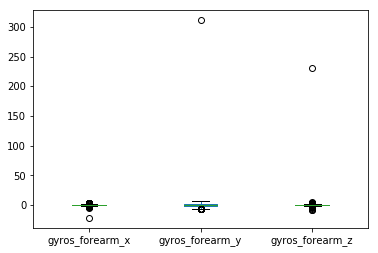

In [250]:
data_train[columns].plot(kind='box')

In [251]:
data_train[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
gyros_forearm_x,19622.0,0.157951,0.648618,-22.00,-0.22,0.05,0.56,3.97
gyros_forearm_y,19622.0,0.075175,3.100725,-7.02,-1.46,0.03,1.62,311.00
gyros_forearm_z,19622.0,0.151245,1.754483,-8.09,-0.18,0.08,0.49,231.00


In [252]:
data_train[data_train['gyros_forearm_x']<0]['gyros_forearm_x']

36      -0.02
37      -0.02
38      -0.02
58      -0.02
87      -0.02
119     -0.02
120     -0.02
121     -0.03
171     -0.03
217     -0.02
230     -0.02
243     -0.08
244     -0.14
245     -0.11
246     -0.06
248     -0.10
249     -0.18
250     -0.29
251     -0.39
252     -0.37
253     -0.31
254     -0.19
255     -0.32
256     -0.29
257     -0.02
272     -0.03
273     -0.02
301     -0.03
323     -0.03
324     -0.02
         ... 
19541   -0.59
19542   -0.64
19543   -0.74
19544   -0.77
19545   -0.56
19546   -0.14
19547   -0.64
19548   -0.14
19549   -0.11
19550   -0.24
19558   -0.06
19559   -0.13
19560   -0.18
19561   -0.13
19562   -0.14
19563   -0.03
19566   -0.16
19567   -0.43
19568   -0.13
19575   -0.05
19578   -0.08
19583   -0.05
19584   -0.43
19585   -0.56
19586   -0.66
19587   -0.83
19588   -0.98
19589   -0.42
19597   -0.61
19598   -0.67
Name: gyros_forearm_x, Length: 8209, dtype: float64

# droping the nan values column wise

In [253]:
data_train.dropna(axis=1,inplace=True)

In [254]:
data_train.isna().sum()

user_name               0
raw_timestamp_part_1    0
raw_timestamp_part_2    0
cvtd_timestamp          0
new_window              0
num_window              0
roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbe

## After dropping the null values checking the shape of the train dataset

In [255]:
data_train.shape

(19622, 59)

## certain columns are not useful in train data, so we will drop it

In [256]:
data_train=data_train.drop(['new_window','user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp'],axis=1)

In [257]:
data_train.describe(include='object').T

,count,unique,top,freq
classe,19622,5,A,5580


## store the target values in variable 'y'

In [258]:
y=data_train['classe'].values

## store the data in X

In [259]:
X=data_train.values

## importing decision tree classifier from scikit learn modules

In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## dividing the data into train and test 

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Since column 53 is not needed we will take upto 52 columns

In [262]:
X_train=X_train[:,0:53]

In [263]:
X_test=X_test[:,0:53]

## Applying the decision classifier on training data

In [264]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## predicting the class on test data set

In [265]:
y_pred_class = dtc.predict(X_test)

In [266]:
y_pred_class

array(['C', 'C', 'B', ..., 'D', 'C', 'A'], dtype=object)

In [267]:
y_test

array(['C', 'C', 'B', ..., 'A', 'C', 'A'], dtype=object)

## importing the metrics module and checking the accuracy of the model

In [268]:
from sklearn import metrics

In [269]:
metrics.accuracy_score(y_test, y_pred_class)

0.9759478189971463

## The accuracy with decision trees is 97.6 percent

## the last part of the task is predicting the classes on the unknown data set, lets check the data

In [270]:
data_test

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,20,...,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,4,...,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,5,...,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,17,...,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,3,...,-0.75,3.10,0.80,131,-93,172,375,-787,91,5
6,jeremy,1322673149,510661,30/11/2011 17:12,no,504,-5.92,1.59,-87.70,4,...,-0.88,4.26,1.35,230,322,-144,-300,800,884,6
7,jeremy,1322673128,766645,30/11/2011 17:12,no,485,1.20,4.44,-87.30,4,...,-0.53,1.80,0.75,-192,170,-175,-678,284,585,7
8,jeremy,1322673076,54671,30/11/2011 17:11,no,440,0.43,4.15,-88.50,4,...,0.63,-0.74,0.49,-151,-331,-282,-109,-619,-32,8
9,carlitos,1323084240,916313,05/12/2011 11:24,no,323,0.93,6.72,-93.70,4,...,0.03,0.02,-0.02,195,204,-217,0,652,469,9
10,charles,1322837822,384285,02/12/2011 14:57,no,664,114.00,22.40,-13.10,18,...,0.02,0.13,-0.07,-212,98,-7,-403,723,512,10


## droping the na values columnwise

In [271]:
data_test.dropna(axis=1,inplace=True)

## dropping unwanted columns from test data

In [272]:
data_test=data_test.drop(['new_window','user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp'],axis=1)

In [273]:
data_test=data_test.drop(['problem_id'],axis=1)

In [274]:
data_test=data_test.values

## predicting the classes on the new data

In [275]:
y_pred= dtc.predict(data_test)

In [276]:
y_pred

array(['B', 'A', 'B', 'A', 'A', 'E', 'D', 'B', 'A', 'A', 'B', 'C', 'B',
       'A', 'E', 'E', 'A', 'B', 'B', 'B'], dtype=object)

## applying random forest

In [277]:
from sklearn.ensemble import RandomForestClassifier
rft=RandomForestClassifier(n_estimators=1000,random_state=1)
rft.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

## predicting on the new dataset by random forest model

In [278]:
rft.predict(data_test)

array(['B', 'A', 'B', 'A', 'A', 'E', 'D', 'B', 'A', 'A', 'B', 'C', 'B',
       'A', 'E', 'E', 'A', 'B', 'B', 'B'], dtype=object)